In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_excel('titanic3.xls')

In [3]:
data.shape

(1309, 14)

In [4]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [6]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [7]:
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [8]:
# data = data.set_index('pclass')
data

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000
...,...,...,...,...
1304,3,0,female,14.5000
1305,3,0,female,NaN
1306,3,0,male,26.5000
1307,3,0,male,27.0000


In [9]:
data = data.dropna(axis=0)

In [10]:
data.shape

(1046, 4)

In [11]:
data.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [12]:
data['pclass'].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

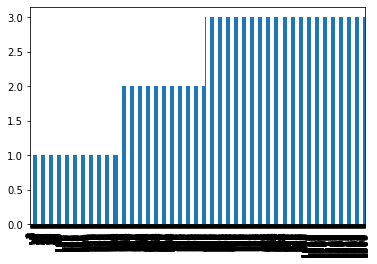

In [13]:
data['pclass'].plot.bar()
plt.show()

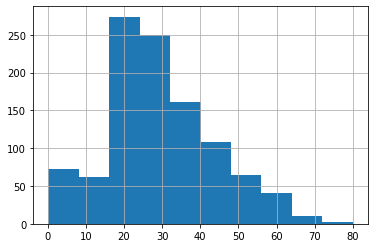

In [14]:
data['age'].hist()

In [15]:
data.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [16]:
data['age'] < 18

0       False
1        True
2        True
3       False
4       False
        ...  
1301    False
1304     True
1306    False
1307    False
1308    False
Name: age, Length: 1046, dtype: bool

In [17]:
data[data['age'] < 18]

,pclass,survived,sex,age
1,1,1,male,0.9167
2,1,0,female,2.0000
53,1,0,male,17.0000
54,1,1,male,11.0000
55,1,1,female,14.0000
...,...,...,...,...
1265,3,0,female,10.0000
1275,3,0,male,16.0000
1279,3,0,female,14.0000
1300,3,1,female,15.0000


In [18]:
data['age'][0:10]

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
5    48.0000
6    63.0000
7    39.0000
8    53.0000
9    71.0000
Name: age, dtype: float64

In [19]:
# Transformer le string en int(nombre)

data['sex'].map({'male':0, 'female':1})

0       1
1       0
2       1
3       0
4       1
       ..
1301    0
1304    1
1306    0
1307    0
1308    0
Name: sex, Length: 1046, dtype: int64

In [20]:
# Transformer le string en int(nombre)

data['sex'].replace(['male', 'female'], [0, 1])

0       1
1       0
2       1
3       0
4       1
       ..
1301    0
1304    1
1306    0
1307    0
1308    0
Name: sex, Length: 1046, dtype: int64

In [21]:
# Transformer le string en int(nombre) plus interessant

data['sex'].astype('category').cat.codes

0       0
1       1
2       0
3       1
4       0
       ..
1301    1
1304    0
1306    1
1307    1
1308    1
Length: 1046, dtype: int8

# Bitcoin et TimeSeries

In [22]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)

In [23]:
bitcoin

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389165
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560102
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736825
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702624
...,...,...,...,...,...,...
2020-12-09,15129.185547,15423.576172,14784.541016,15361.175781,15361.175781,28497349693
2020-12-10,15360.666016,15360.666016,14796.406250,15040.947266,15040.947266,21037680214
2020-12-11,15040.072266,15040.599609,14539.374023,14910.423828,14910.423828,23051991178


In [24]:
bitcoin.shape

(2280, 6)

In [25]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389165
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560102
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736825
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702624


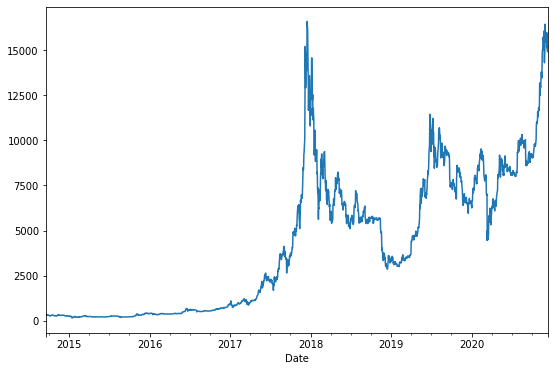

In [26]:
bitcoin['Close'].plot(figsize=(9, 6))
plt.show()

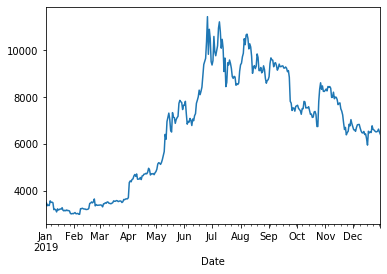

In [27]:
bitcoin['2019']['Close'].plot()

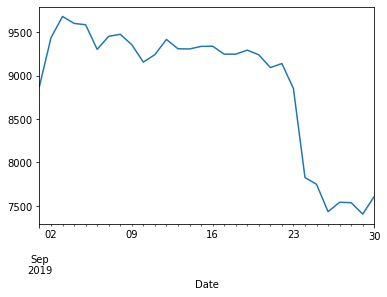

In [28]:
bitcoin['2019-09']['Close'].plot()

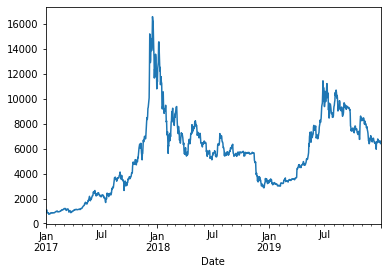

In [29]:
bitcoin['2017':'2019']['Close'].plot()

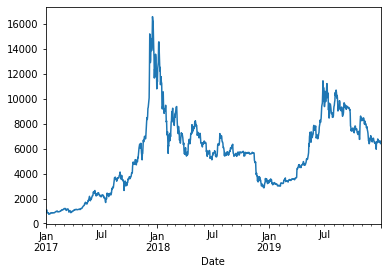

In [30]:
# Ou
bitcoin.loc['2017':'2019', 'Close'].plot()
plt.show()

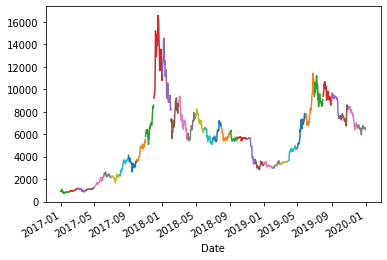

In [31]:
# Regrouper les données selon une fréquence
# En suivant les mois

bitcoin.loc['2017':'2019', 'Close'].resample('M').plot()
plt.show()

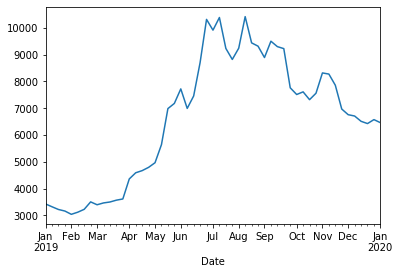

In [32]:
# Regrouper les données selon une fréquence
# En suivant les semaines par moyenne

bitcoin.loc['2019', 'Close'].resample('W').mean().plot()
plt.show()


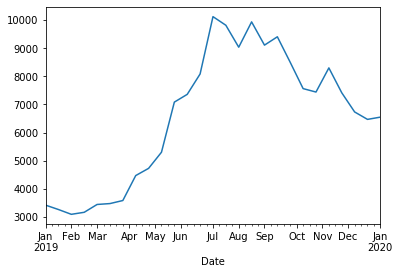

In [33]:
# Regrouper les données selon une fréquence
# En suivant tous les deux (02) semaines par moyenne

bitcoin.loc['2019', 'Close'].resample('2W').mean().plot()
plt.show()

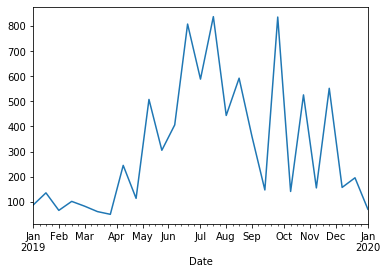

In [34]:
# Regrouper les données selon une fréquence
# En suivant tous les deux (02) semaines par l'écart type

bitcoin.loc['2019', 'Close'].resample('2W').std().plot()
plt.show()

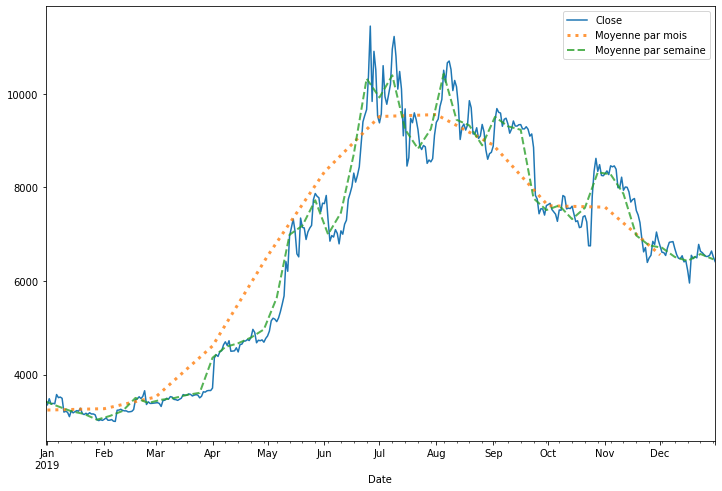

In [35]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].resample('M').mean().plot(label='Moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label='Moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

In [36]:
# Rassembler dans un seul tableau plusieurs statistiques

bitcoin.loc['2019', 'Close'].resample('M').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
Date,,,,
2019-01-31,3241.492786,154.675614,3015.454102,3572.601807
2019-02-28,3270.404367,183.437120,2998.157227,3653.833008
2019-03-31,3518.958677,84.929101,3317.817383,3659.444824
2019-04-30,4609.844377,222.918594,3710.858154,4964.707031
2019-05-31,6532.714403,1010.175947,4823.619629,7866.871094
2019-06-30,8327.527637,1357.107430,6791.208984,11443.038086
2019-07-31,9511.153604,776.404643,8452.749023,11221.008789
2019-08-31,9552.757151,598.797179,8598.343750,10697.322266
2019-09-30,8902.757308,762.564631,7405.604980,9681.073242


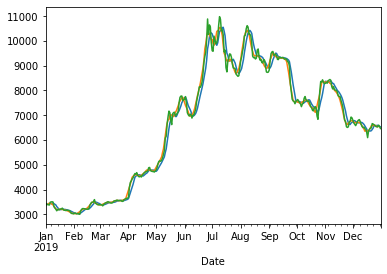

In [37]:
bitcoin.loc['2019', 'Close'].rolling(window=7).mean().plot()
bitcoin.loc['2019', 'Close'].rolling(window=7, center=True).mean().plot()
bitcoin.loc['2019', 'Close'].ewm(alpha=0.6).mean().plot()
plt.show()

# Ethereum EUR (ETH-EUR) et TimeSeries

In [38]:
ethereum = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)

In [39]:
ethereum.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-13,130.200897,131.160538,129.262619,130.340103,130.340103,6532807966
2019-12-14,130.347916,130.865570,128.082855,128.473724,128.473724,6337903744
2019-12-15,128.469910,129.376373,125.332695,128.647919,128.647919,6503773457
2019-12-16,128.669983,128.605026,118.936012,119.975243,119.975243,8074385928
2019-12-17,120.005013,120.173500,108.859825,109.943810,109.943810,8121923165


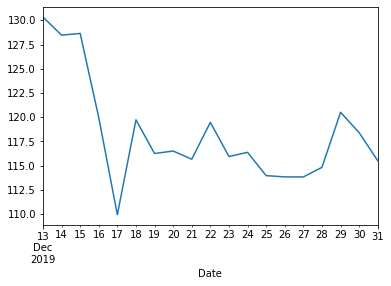

In [40]:
ethereum['2019']['Close'].plot()
plt.show()

In [41]:
# Rassembler deux DataSets

btc_eth = pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))

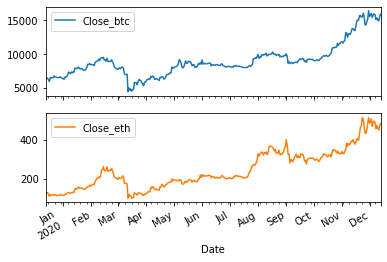

In [42]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True)
plt.show()

In [43]:
# La correlation de bitcoin et de l'éthereum

btc_eth[['Close_btc', 'Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.924629
Close_eth,0.924629,1.000000


# Seaborn

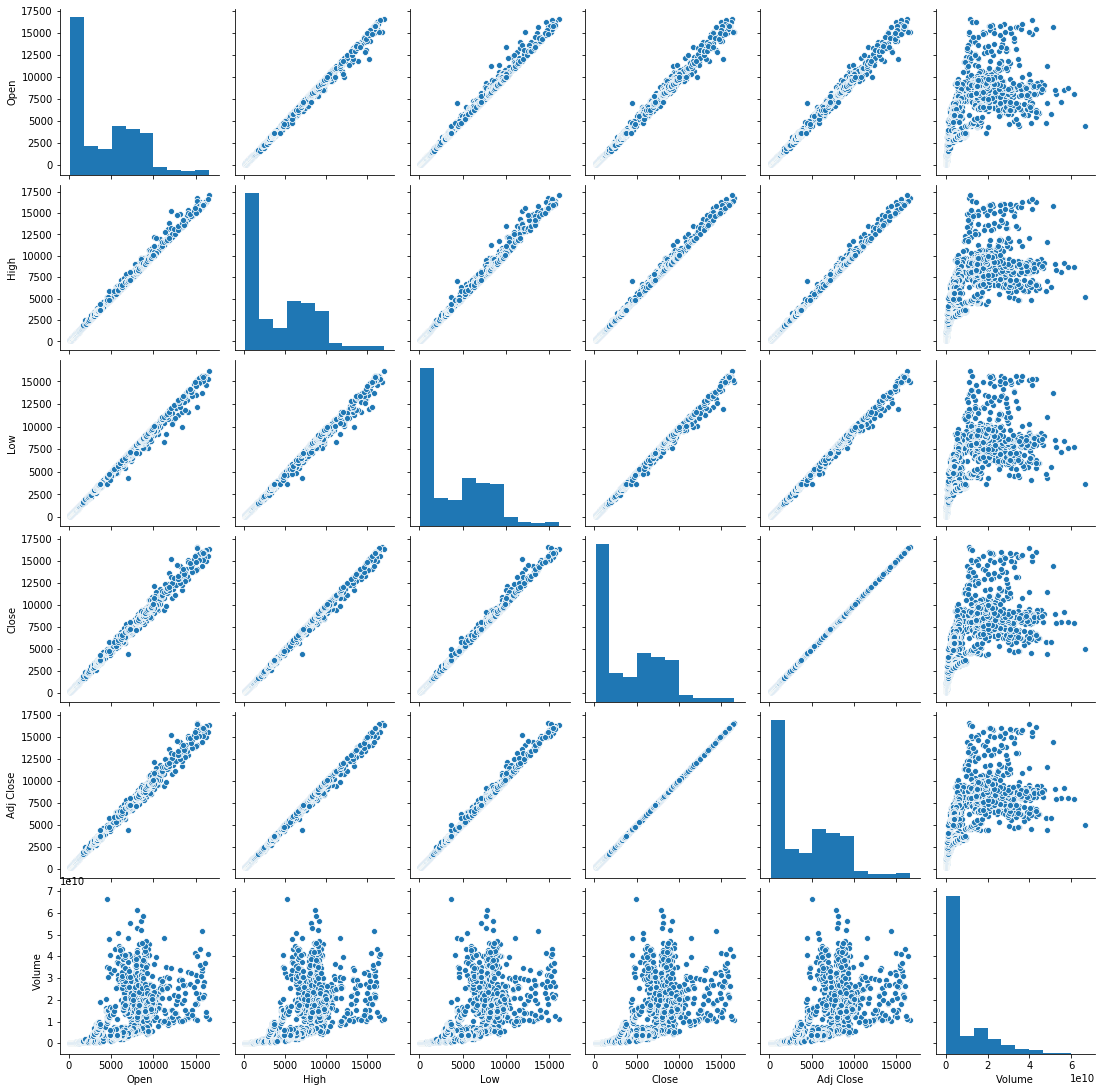

In [44]:
sns.pairplot(bitcoin)

In [45]:
iris = pd.read_csv('iris.csv')

In [46]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


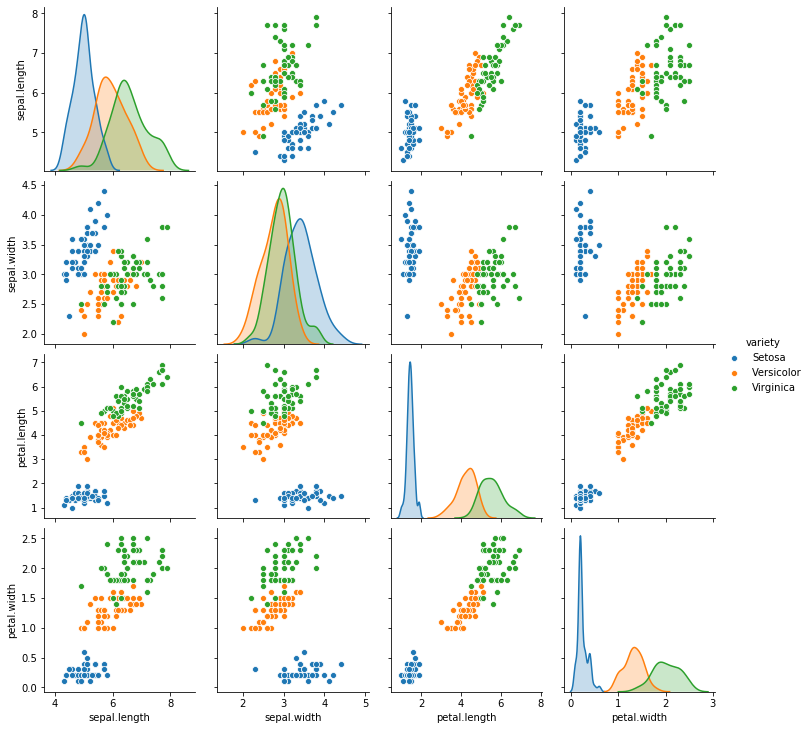

In [47]:
sns.pairplot(iris, hue = 'variety')

In [48]:
iris.shape

(150, 5)

In [49]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [50]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [51]:
iris.agg(['mean', 'std', 'min', 'max'])

,sepal.length,sepal.width,petal.length,petal.width,variety
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,Setosa
max,7.900000,4.400000,6.900000,2.500000,Virginica


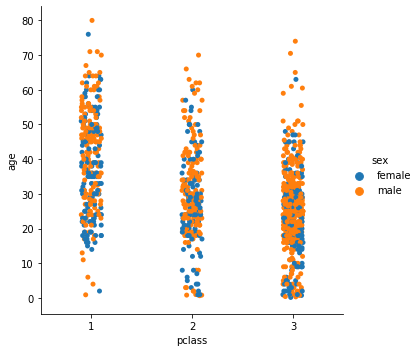

In [54]:
sns.catplot(x='pclass', y='age', data=data, hue='sex')

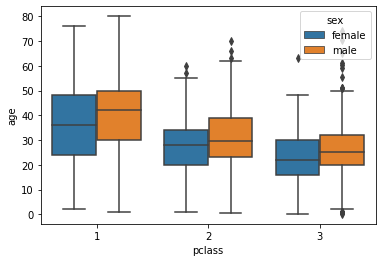

In [55]:
sns.boxplot(x='pclass', y='age', data=data, hue='sex')

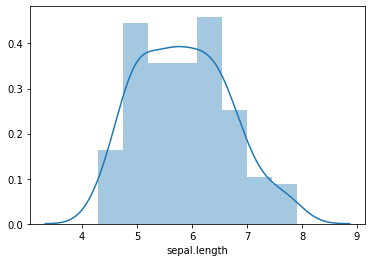

In [57]:
sns.distplot(iris['sepal.length'])

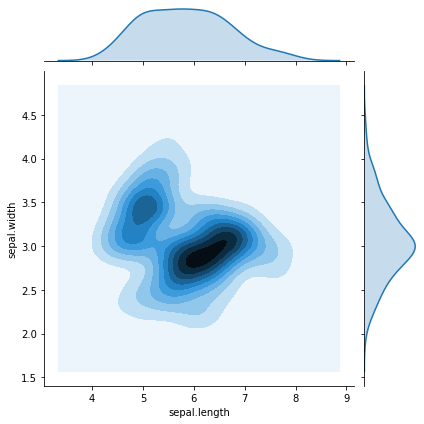

In [62]:
sns.jointplot('sepal.length', 'sepal.width', data=iris, kind='kde')

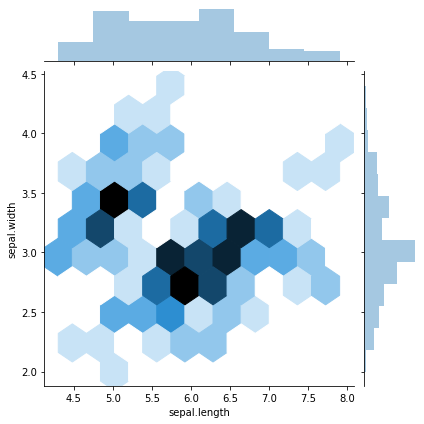

In [63]:
sns.jointplot('sepal.length', 'sepal.width', data=iris, kind='hex')

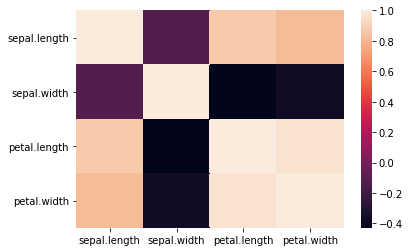

In [64]:
sns.heatmap(iris.corr())